# Minimum Variance Beamformer

参考论文：https://www.researchgate.net/publication/6135459_Adaptive_Beamforming_Applied_to_Medical_Ultrasound_Imaging

### 1. 生成钟组随机数据(Normalized)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sample_size = 10
clock_size = 5
test_data = np.random.rand(sample_size, clock_size)

[[0.94075749 0.66599487 0.35890765 0.3782637  0.01345596]
 [0.86081335 0.47316254 0.91238311 0.80264156 0.89708285]
 [0.35328455 0.53415335 0.82016575 0.84919229 0.09858165]
 [0.27147196 0.52953547 0.12057804 0.1698854  0.83411725]
 [0.86126801 0.02907637 0.97432331 0.47264709 0.65583857]
 [0.08609864 0.68834818 0.35795006 0.93452637 0.47029366]
 [0.39359173 0.53470902 0.9001847  0.97784591 0.65988212]
 [0.9572748  0.77201901 0.41350756 0.57898508 0.34770861]
 [0.38101954 0.24797107 0.30764104 0.5734483  0.30789678]
 [0.63941493 0.50558899 0.7026841  0.46439454 0.98449115]]


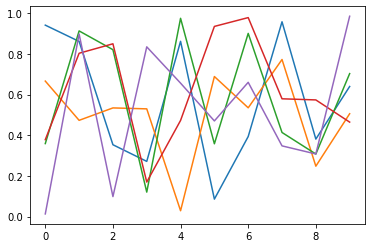

In [2]:
print(test_data)
fig = plt.figure(facecolor='white')
plt.plot(test_data)
plt.show()

### 2. 安装Allan Variance组件包

In [3]:
# https://allantools.readthedocs.io/en/latest/functions.html
!pip install allantools
import allantools

You should consider upgrading via the 'pip install --upgrade pip' command.


### 3. 生成子钟组

In [4]:
subset_size = 3
subsets = list()
for i in range(test_data.shape[1]):
    if i + subset_size <= test_data.shape[1]:
        subset = test_data[:,i:i+subset_size]
        subsets.append(subset)
print(subsets)

[array([[0.94075749, 0.66599487, 0.35890765],
       [0.86081335, 0.47316254, 0.91238311],
       [0.35328455, 0.53415335, 0.82016575],
       [0.27147196, 0.52953547, 0.12057804],
       [0.86126801, 0.02907637, 0.97432331],
       [0.08609864, 0.68834818, 0.35795006],
       [0.39359173, 0.53470902, 0.9001847 ],
       [0.9572748 , 0.77201901, 0.41350756],
       [0.38101954, 0.24797107, 0.30764104],
       [0.63941493, 0.50558899, 0.7026841 ]]), array([[0.66599487, 0.35890765, 0.3782637 ],
       [0.47316254, 0.91238311, 0.80264156],
       [0.53415335, 0.82016575, 0.84919229],
       [0.52953547, 0.12057804, 0.1698854 ],
       [0.02907637, 0.97432331, 0.47264709],
       [0.68834818, 0.35795006, 0.93452637],
       [0.53470902, 0.9001847 , 0.97784591],
       [0.77201901, 0.41350756, 0.57898508],
       [0.24797107, 0.30764104, 0.5734483 ],
       [0.50558899, 0.7026841 , 0.46439454]]), array([[0.35890765, 0.3782637 , 0.01345596],
       [0.91238311, 0.80264156, 0.89708285],
     

### 4. 在滑动窗口内计算协方差矩阵，并计算各子钟组权重

------------------Step 0------------------
*** Raw sum ***
[1.96566001 2.24635899 1.70760365 0.92158547 1.86466769]
*** Raw sum ***
[1.40316622 2.18818721 2.20351139 0.8199989  1.47604677]
*** Raw sum ***
[0.75062731 2.61210752 1.76793969 1.12458068 2.10280898]
*** Cov mean ***
[[0.08280907 0.0713891  0.06389442]
 [0.0713891  0.11425391 0.09715332]
 [0.06389442 0.09715332 0.18559981]]
*** Inverse Cov mean ***
[[ 26.24375839 -15.70657278  -0.81295266]
 [-15.70657278  25.17345698  -7.77006566]
 [ -0.81295266  -7.77006566   9.73508982]]
*** Weight ***
[[0.77341429]
 [0.13495601]
 [0.0916297 ]]
*** Weighted output ***
[0.592805   0.7573406  0.59335265 0.30882538 0.61134726]


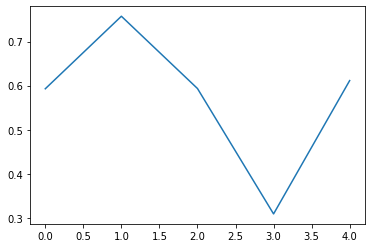

*** Weighted output's Allan Variance ***
[0.27901139]
*** Each subset's Allan Variance ***
[0.78765819]
[1.05743272]
[1.29037468]
------------------Step 1------------------
*** Raw sum ***
[2.24635899 1.70760365 0.92158547 1.86466769 1.13239688]
*** Raw sum ***
[2.18818721 2.20351139 0.8199989  1.47604677 1.98082461]
*** Raw sum ***
[2.61210752 1.76793969 1.12458068 2.10280898 1.76277009]
*** Cov mean ***
[[0.09792174 0.06503637 0.09055517]
 [0.06503637 0.1157989  0.07366136]
 [0.09055517 0.07366136 0.09853387]]
*** Inverse Cov mean ***
[[ 68.57449711   3.00387087 -65.26734514]
 [  3.00387087  16.59747974 -15.16847904]
 [-65.26734514 -15.16847904  81.47072653]]
*** Weight ***
[[0.53579521]
 [0.37634333]
 [0.08786147]]
*** Weighted output ***
[0.75220054 0.63317881 0.3003965  0.57977875 0.50236084]


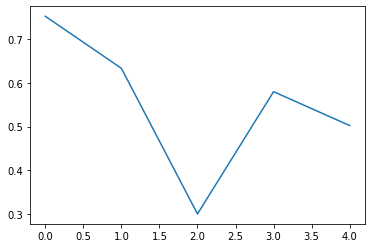

*** Weighted output's Allan Variance ***
[0.30214384]
*** Each subset's Allan Variance ***
[0.98807345]
[1.0115527]
[0.85709761]
------------------Step 2------------------
*** Raw sum ***
[1.70760365 0.92158547 1.86466769 1.13239688 1.82848545]
*** Raw sum ***
[2.20351139 0.8199989  1.47604677 1.98082461 2.41273963]
*** Raw sum ***
[1.76793969 1.12458068 2.10280898 1.76277009 2.53791274]
*** Cov mean ***
[[0.06277252 0.05552658 0.06276668]
 [0.05552658 0.13616934 0.0835519 ]
 [0.06276668 0.0835519  0.08977409]]
*** Inverse Cov mean ***
[[ 53.3463289    2.63933604 -39.754161  ]
 [  2.63933604  17.25141657 -17.90105671]
 [-39.754161   -17.90105671  55.59403858]]
*** Weight ***
[[ 1.00442346]
 [ 0.12312459]
 [-0.12754805]]
*** Weighted output ***
[0.58698878 0.29439534 0.59548148 0.38548544 0.60331181]


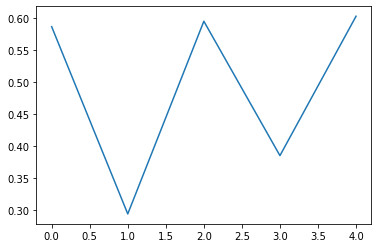

*** Weighted output's Allan Variance ***
[0.36439275]
*** Each subset's Allan Variance ***
[1.14286238]
[0.83546375]
[0.96704047]
------------------Step 3------------------
*** Raw sum ***
[0.92158547 1.86466769 1.13239688 1.82848545 2.14280137]
*** Raw sum ***
[0.8199989  1.47604677 1.98082461 2.41273963 1.76451165]
*** Raw sum ***
[1.12458068 2.10280898 1.76277009 2.53791274 1.34020125]
*** Cov mean ***
[[0.09111367 0.05027297 0.03932418]
 [0.05027297 0.11792983 0.08426402]
 [0.03932418 0.08426402 0.10847753]]
*** Inverse Cov mean ***
[[ 14.40037394  -5.41343947  -1.01518465]
 [ -5.41343947  21.09188735 -14.4214949 ]
 [ -1.01518465 -14.4214949   20.78895467]]
*** Weight ***
[[0.54672258]
 [0.08620499]
 [0.36707244]]
*** Weighted output ***
[0.32911405 0.63952724 0.47897607 0.71308743 0.60519284]


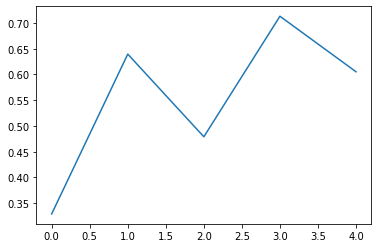

*** Weighted output's Allan Variance ***
[0.2870929]
*** Each subset's Allan Variance ***
[0.91221056]
[0.44626236]
[1.07032796]
------------------Step 4------------------
*** Raw sum ***
[1.86466769 1.13239688 1.82848545 2.14280137 0.93663165]
*** Raw sum ***
[1.47604677 1.98082461 2.41273963 1.76451165 1.12906041]
*** Raw sum ***
[2.10280898 1.76277009 2.53791274 1.34020125 1.18898611]
*** Cov mean ***
[[0.08948271 0.03258539 0.03505196]
 [0.03258539 0.07944133 0.06420023]
 [0.03505196 0.06420023 0.10178675]]
*** Inverse Cov mean ***
[[ 13.40595726  -3.6061749   -2.34203144]
 [ -3.6061749   26.64521138 -15.56415866]
 [ -2.34203144 -15.56415866  20.44780184]]
*** Weight ***
[[0.42678541]
 [0.42776553]
 [0.14544905]]
*** Weighted output ***
[0.57768883 0.52900407 0.72719826 0.62141488 0.35188359]


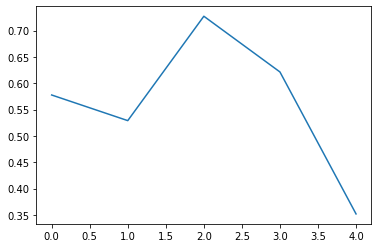

*** Weighted output's Allan Variance ***
[0.17328443]
*** Each subset's Allan Variance ***
[0.86581729]
[0.44199946]
[1.01906313]
------------------Step 5------------------
*** Raw sum ***
[1.13239688 1.82848545 2.14280137 0.93663165 1.84768803]
*** Raw sum ***
[1.98082461 2.41273963 1.76451165 1.12906041 1.67266764]
*** Raw sum ***
[1.76277009 2.53791274 1.34020125 1.18898611 2.15156979]
*** Cov mean ***
[[0.08869916 0.03740215 0.03570191]
 [0.03740215 0.07295476 0.06889765]
 [0.03570191 0.06889765 0.10451555]]
*** Inverse Cov mean ***
[[ 14.38428431  -7.24371313  -0.13846395]
 [ -7.24371313  39.96290354 -23.86951761]
 [ -0.13846395 -23.86951761  25.35026742]]
*** Weight ***
[[0.40723976]
 [0.51469343]
 [0.07806681]]
*** Weighted output ***
[0.53942943 0.72819332 0.62848057 0.35179132 0.59377642]


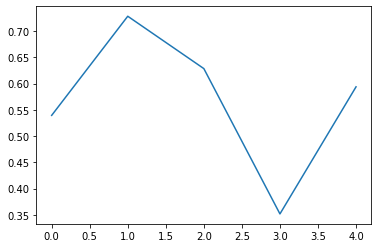

*** Weighted output's Allan Variance ***
[0.25283807]
*** Each subset's Allan Variance ***
[1.07550556]
[0.65282094]
[1.01881106]
------------------Step 6------------------
BREAK


In [5]:
window_size = 5
window_step = 1
A = np.ones((clock_size - subset_size + 1, 1))

for i in range(test_data.shape[0]):
    subset_raw_sum_list = list()
    print("------------------Step %s------------------" % i)
    for j in range(len(subsets)):
        if i + window_size <= test_data.shape[0]:
            # 1. Get raw subset
            subset_raw = subsets[j][i:i+window_size,]
            
            # 2. Calculate summation within a subset 
            if subset_raw is None:
                break
            subset_raw_sum = np.sum(subset_raw, axis=1)
            subset_raw_sum_list.append(subset_raw_sum)
            print("*** Raw sum ***")
            print(subset_raw_sum)
    if len(subset_raw_sum_list) == 0:
        print("BREAK")
        break
   
    # 3. Calculate covariance matrix mean (Element-wise)
    print("*** Cov mean ***")
    allset_cov_mean = np.cov(np.asarray(subset_raw_sum_list)) / (clock_size - subset_size + 1)
    print(allset_cov_mean)
    
    # 4. Calculate the inverse of covariance matrix mean
    print("*** Inverse Cov mean ***")
    allset_cov_mean_inverse = np.linalg.inv(allset_cov_mean)
    print(allset_cov_mean_inverse)
    
    # 5. Calculate weight
    print("*** Weight ***")
    weight = np.dot(allset_cov_mean_inverse, A) / np.dot(np.dot(A.T, allset_cov_mean_inverse), A)
    print(weight)

    # 6. Calculate weighted clock
    print("*** Weighted output ***")
    Z = (np.dot(weight.T, np.asarray(subset_raw_sum_list)) / (clock_size - subset_size + 1))[0]
    print(Z)
    fig = plt.figure(facecolor='white')
    plt.plot(Z)
    plt.show()
    
    # 7. Calculate Allan variance
    print("*** Weighted output's Allan Variance ***")
    (taus, adevs, errors, ns) = allantools.adev(Z)
    print(adevs)
    
    print("*** Each subset's Allan Variance ***")
    for item in subset_raw_sum_list:
        (taus, adevs, errors, ns) = allantools.adev(item)
        print(adevs)

### 计算R(n)的估计
$ \hat{R}(n)=\frac{1}{(2K+1)(M-L+1)}\sum_{k=-K}^K\sum_{l=0}^{M-L}\bar{X_l}(n-k)\bar{X_l}(n-k)^{H} $